In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!ls "indian-sign-language-dataset/data"
# uncomment below line for kaggle 
#!ls "../input/indian-sign-language-dataset/data"

1  3  5  7  9  B  D  F	H  J  L  N  P  R  T  V	X  Z
2  4  6  8  A  C  E  G	I  K  M  O  Q  S  U  W	Y


In [3]:
from os import listdir

In [4]:
total_signs=sorted(listdir("indian-sign-language-dataset/data"))
print(total_signs)

['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [5]:
# Important imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam

from PIL import Image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

2024-06-27 16:40:26.043514: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 16:40:26.043627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 16:40:26.156410: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


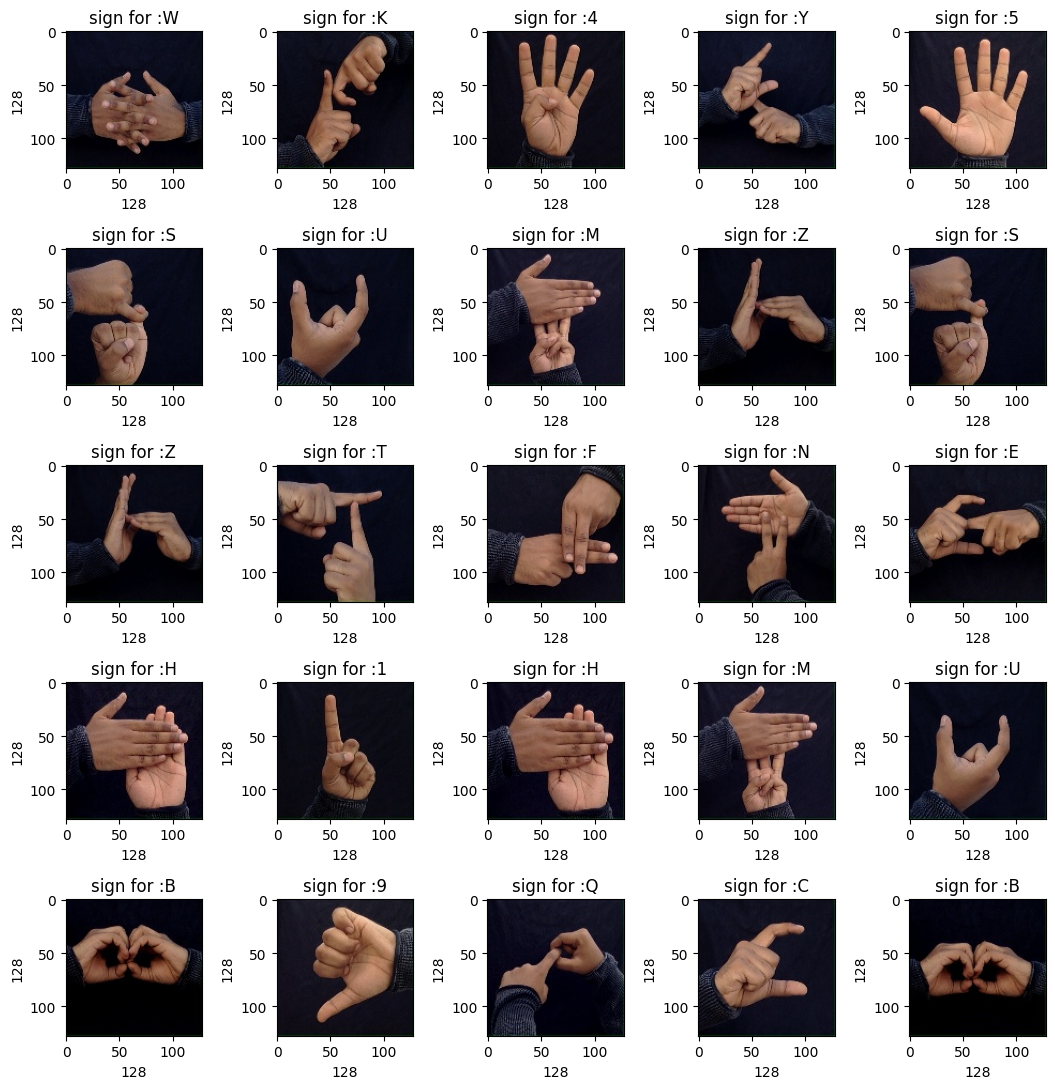

In [6]:
# Plotting 25 images to check dataset
plt.figure(figsize=(11,11))
path = "indian-sign-language-dataset/data"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    directry=random.choice(total_signs)
    rand_img = imread(path +'/'+ directry+'/'+random.choice(sorted(listdir(path+'/'+directry+'/'))))
    plt.imshow(rand_img)
    plt.title('sign for :'+directry)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [7]:
for each in total_signs:
    print(pd.value_counts("indian-sign-language-isl/Indian"+each))

../input/indian-sign-language-isl/Indian1    41
Name: count, dtype: int64
../input/indian-sign-language-isl/Indian2    41
Name: count, dtype: int64
../input/indian-sign-language-isl/Indian3    41
Name: count, dtype: int64
../input/indian-sign-language-isl/Indian4    41
Name: count, dtype: int64
../input/indian-sign-language-isl/Indian5    41
Name: count, dtype: int64
../input/indian-sign-language-isl/Indian6    41
Name: count, dtype: int64
../input/indian-sign-language-isl/Indian7    41
Name: count, dtype: int64
../input/indian-sign-language-isl/Indian8    41
Name: count, dtype: int64
../input/indian-sign-language-isl/Indian9    41
Name: count, dtype: int64
../input/indian-sign-language-isl/IndianA    41
Name: count, dtype: int64
../input/indian-sign-language-isl/IndianB    41
Name: count, dtype: int64
../input/indian-sign-language-isl/IndianC    41
Name: count, dtype: int64
../input/indian-sign-language-isl/IndianD    41
Name: count, dtype: int64
../input/indian-sign-language-isl/Indi

/tmp/ipykernel_34/2706666991.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts("../input/indian-sign-language-isl/Indian"+each))
/tmp/ipykernel_34/2706666991.py:2: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  print(pd.value_counts("../input/indian-sign-language-isl/Indian"+each))
/tmp/ipykernel_34/2706666991.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts("../input/indian-sign-language-isl/Indian"+each))
/tmp/ipykernel_34/2706666991.py:2: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  print(pd.value_counts("../input/indian-sign-language-isl/Ind

In [8]:
dir1 = "indian-sign-language-dataset/data"
root_dir = listdir(dir1)
image_list, label_list = [], []
print(root_dir)

['N', '7', 'R', '2', 'B', 'I', 'F', 'H', '5', 'E', 'U', 'M', '8', 'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', '3', '1', 'C', '4', 'P', '9', 'L', '6', 'W', 'D', 'J']


In [9]:
for directory in root_dir:
    for files in listdir(f"{dir1}/{directory}"):
        image_path = f"{dir1}/{directory}/{files}"
        image = Image.open(image_path)
        image = image.resize((50,50)) # All images does not have same dimension
        image = img_to_array(image)
        image_list.append(image)
        label_list.append(directory)

In [11]:
# Visualize the number of classes count
print(directory)
label_counts = pd.DataFrame(label_list).value_counts()
sorted(label_counts)

J


[1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200,
 1200]

In [12]:
num_classes = len(label_counts)
num_classes

35

In [13]:
np.array(image_list).shape

(42000, 50, 50, 3)

In [14]:
label_list = np.array(label_list)
label_list.shape

(42000,)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [16]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 50,50,3)
x_test = x_test.reshape( -1, 50,50,3)

In [17]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I'
 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [18]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [19]:
print(y_train.shape)
print(x_train.shape)

(26880, 35)
(26880, 50, 50, 3)


In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# First Conv layer
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(50, 50, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Second Conv layer
model.add(Conv2D(90, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Conv layer
model.add(Conv2D(90, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten before Dense layers
model.add(Flatten())

# First Dense layer
model.add(Dense(60, activation="relu"))

# Second Dense layer
model.add(Dense(40, activation="relu"))

# Output layer
model.add(Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 90)     │        26,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 90)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 90)       │        72,990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 90)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1440)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 60)             │        86,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 35)             │         1,435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,231 (743.09 KB)

 Trainable params: 190,231 (743.09 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from tensorflow import keras
early_stopping = keras.callbacks.EarlyStopping(monitor='val-loss', patience=3, mode='min')
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 150, epochs =5,validation_data=(x_val,y_val),callbacks=[early_stopping])
#early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

Epoch 1/5
 16/180 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0529 - loss: 3.4956

W0000 00:00:1719508178.421880     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5956 - loss: 1.4679

W0000 00:00:1719508183.813584     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


180/180 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5970 - loss: 1.4627 - val_accuracy: 1.0000 - val_loss: 7.0901e-04
Epoch 2/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - loss: 4.5377e-04 - val_accuracy: 1.0000 - val_loss: 1.9982e-04
Epoch 3/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - loss: 1.5987e-04 - val_accuracy: 1.0000 - val_loss: 7.9462e-05
Epoch 4/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 6.4922e-05 - val_accuracy: 1.0000 - val_loss: 4.3914e-05
Epoch 5/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 3.6045e-05 - val_accuracy: 1.0000 - val_loss: 2.8864e-05


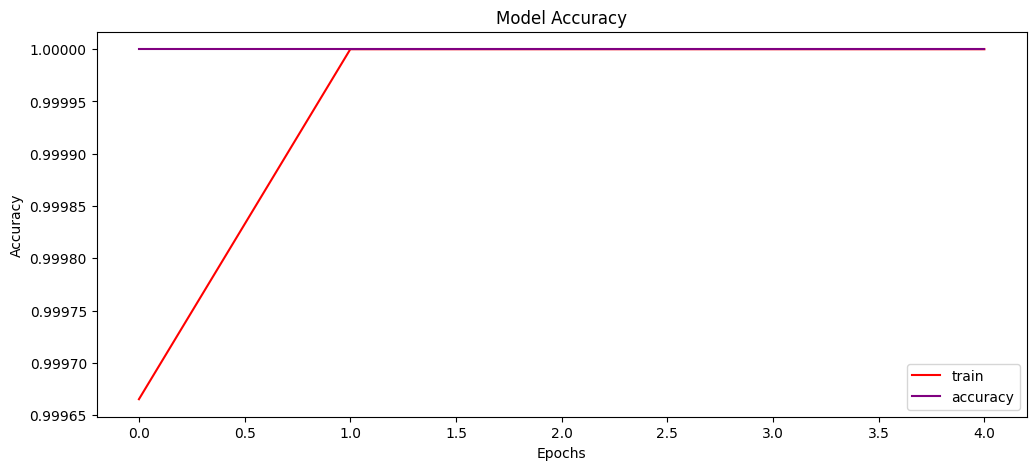

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='purple')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'accuracy'])
plt.show()

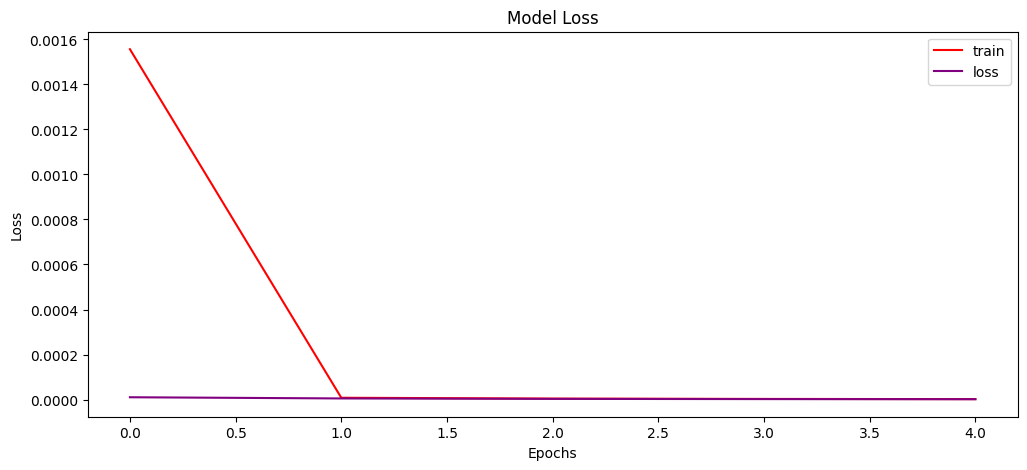

In [27]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='purple')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'loss'])
plt.show()

In [38]:
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

 78/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.8413e-05

W0000 00:00:1719508201.967154     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.9747e-05
Test Accuracy: 100.0


In [39]:
import os
labels = sorted([folder for folder in os.listdir('indian-sign-language-dataset') if not folder.startswith('.')])

In [40]:
with open('labels.txt', 'w') as file:
    for label in labels:
      file.write(label)
      file.write('\n')

In [41]:
f = open("labels.txt",'r')
f.readlines()

['data\n']

In [42]:
model.save("SignLanguage.h5")

In [43]:
model_json = model.to_json()
with open("model_json.json","w") as json_file:
    json_file.write(model_json)